In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
####################
# 첫 페이지 크롤링 #
####################

url = 'https://finance.naver.com/item/sise_day.naver?code=352820&page=1'
headers = {'User-Agent':'Mozilla/5.0'}
res = requests.get(url, headers=headers)
soup = BeautifulSoup(res.text, 'html.parser')
soup


<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>네이버페이 증권</title>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20231020132851/css/newstock.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20231020132851/css/common.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20231020132851/css/layout.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20231020132851/css/main.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20231020132851/css/newstock2.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20231020132851/css/newstock3.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20231020132851/css/world.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<script languag

In [3]:
# 증권 속성 추출
title = soup.select('table.type2 > tr > th')
title_list = []
for i in title:
  title_list.append(i.text)
title_list

['날짜', '종가', '전일비', '시가', '고가', '저가', '거래량']

In [4]:
# 수치 데이터 추출
num_data = soup.select('tr > td > span.tah')
num_data_list = []
for i in num_data:
  num_data_list.append(i.text)
num_data_list # 리스트 첫 번째 항부터 날짜, 종가, 전일비, 시가, 고가, 저가, 거래량 순이며, 그 이후 날짜, 종가 ... 순으로 반복된다고 알 수 있음

['2023.10.25',
 '228,500',
 '\n\t\t\t\t3,000\n\t\t\t\t',
 '233,000',
 '235,500',
 '227,000',
 '140,031',
 '2023.10.24',
 '231,500',
 '\n\t\t\t\t2,500\n\t\t\t\t',
 '232,500',
 '235,500',
 '226,000',
 '105,953',
 '2023.10.23',
 '229,000',
 '\n\t\t\t\t4,500\n\t\t\t\t',
 '224,500',
 '234,500',
 '224,500',
 '141,201',
 '2023.10.20',
 '224,500',
 '\n\t\t\t\t3,000\n\t\t\t\t',
 '224,000',
 '228,000',
 '222,000',
 '130,309',
 '2023.10.19',
 '227,500',
 '\n\t\t\t\t6,500\n\t\t\t\t',
 '230,000',
 '233,500',
 '227,000',
 '117,136',
 '2023.10.18',
 '234,000',
 '\n\t\t\t\t3,500\n\t\t\t\t',
 '236,500',
 '240,000',
 '233,500',
 '86,725',
 '2023.10.17',
 '237,500',
 '\n\t\t\t\t2,500\n\t\t\t\t',
 '243,000',
 '245,000',
 '237,000',
 '122,953',
 '2023.10.16',
 '240,000',
 '\n\t\t\t\t4,500\n\t\t\t\t',
 '243,000',
 '243,000',
 '238,000',
 '106,675',
 '2023.10.13',
 '244,500',
 '\n\t\t\t\t1,500\n\t\t\t\t',
 '244,000',
 '247,500',
 '242,000',
 '126,861',
 '2023.10.12',
 '246,000',
 '\n\t\t\t\t17,500\n\t\t\t\t'

In [5]:
# 특정 인덱스에 7를 나눈 후 나머지를 통해 각 증권 속성에 대한 데이터를 추출할 수 있음
data_list = [] # 날짜
end_price = [] # 종가
start_price = [] # 시가
up_down_price = [] # 전일비
top_price = [] # 고가
below_price = [] # 저가
trade_price = [] # 거래량
for idx, val in enumerate(num_data_list):
  if idx % 7 == 0: # 날짜
    data_list.append(val)
  elif idx % 7 == 1: # 종가
    end_price.append(int(val.replace(',','')))
  elif idx % 7 == 2: # 전일비
    up_down_price.append(int(val.strip().replace(',','')))
  elif idx % 7 == 3: # 시가
    start_price.append(int(val.replace(',','')))
  elif idx % 7 == 4: # 고가
    top_price.append(int(val.replace(',','')))
  elif idx % 7 == 5: # 저가
    below_price.append(int(val.replace(',','')))
  else: # 거래량
    trade_price.append(int(val.replace(',','')))
up_down_price_result = []
for i, j, k in zip(up_down_price, end_price, start_price):
  if j < k:
    up_down_price_result.append(-i)
  else:
    up_down_price_result.append(i)

In [6]:
# pandas를 이용하여 Dataframe으로 정렬
import pandas as pd

In [7]:
df_dic = {'날짜':data_list,'종가':end_price,'시가':start_price,'전일비':up_down_price_result,'고가':top_price,'저가':below_price,'거래량':trade_price}
df = pd.DataFrame(df_dic)
df

,날짜,종가,시가,전일비,고가,저가,거래량
0,2023.10.25,228500,233000,-3000,235500,227000,140031
1,2023.10.24,231500,232500,-2500,235500,226000,105953
2,2023.10.23,229000,224500,4500,234500,224500,141201
3,2023.10.20,224500,224000,3000,228000,222000,130309
4,2023.10.19,227500,230000,-6500,233500,227000,117136
5,2023.10.18,234000,236500,-3500,240000,233500,86725
6,2023.10.17,237500,243000,-2500,245000,237000,122953
7,2023.10.16,240000,243000,-4500,243000,238000,106675
8,2023.10.13,244500,244000,1500,247500,242000,126861
9,2023.10.12,246000,231500,17500,246500,230000,308148


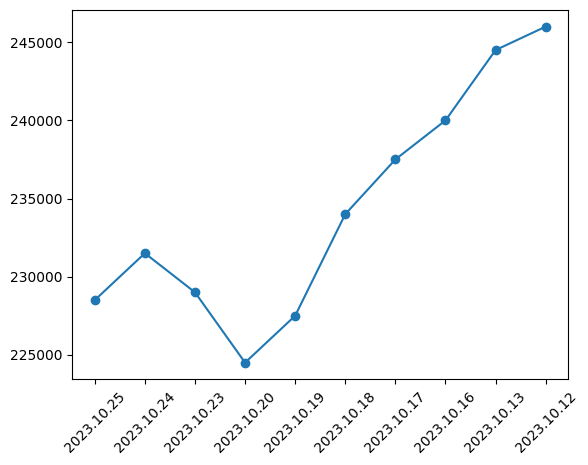

In [8]:
# 시각화
import matplotlib.pyplot as plt
# 종가
plt.plot(df['날짜'], df['종가'])
plt.scatter(df['날짜'], df['종가'])
plt.xticks(ticks=df['날짜'], rotation = 45)
plt.show()

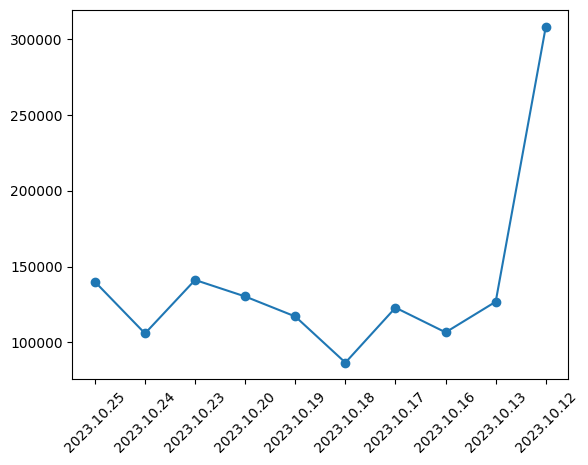

In [9]:
# 거래량
plt.plot(df['날짜'], df['거래량'])
plt.scatter(df['날짜'], df['거래량'])
plt.xticks(ticks = df['날짜'], rotation = 45)
plt.show()

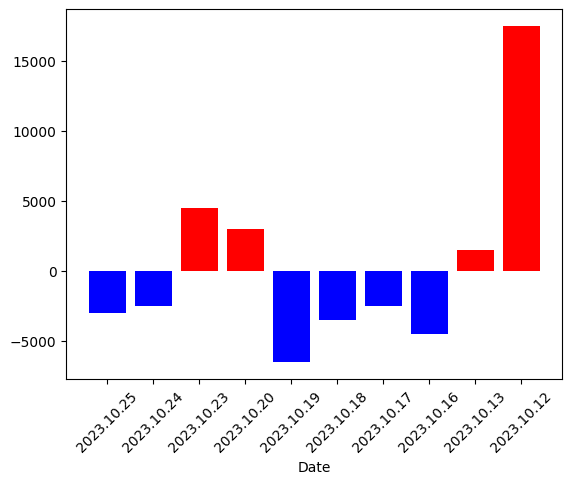

In [10]:
# 전일비
color = []
for i in df['전일비']:
  if i >= 0:
    color.append('red')
  else:
    color.append('blue')
plt.bar(df['날짜'], df['전일비'], color = color)
plt.xlabel('Date')
plt.xticks(ticks = df['날짜'], rotation = 45)
plt.show()